In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers  import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

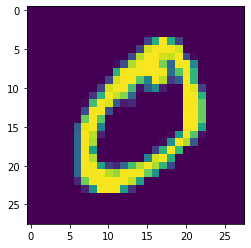

In [5]:

plt.imshow(x_train[1])

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train.max()

255

In [9]:
x_train=x_train/255.0
x_test= x_test/255.0

In [10]:
x_train.min()

0.0

In [11]:
x_train= x_train.reshape(60000, 28, 28, 1)
x_test= x_test.reshape(10000, 28, 28, 1)

In [12]:
input_shape= x_train[0].shape

In [13]:
model= Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [16]:
history= model.fit(x_train, y_train, batch_size=120, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
500/500 [==============================] - 85s 169ms/step - loss: 0.2495 - accuracy: 0.9229 - val_loss: 0.0539 - val_accuracy: 0.9826
Epoch 2/10
500/500 [==============================] - 90s 180ms/step - loss: 0.0916 - accuracy: 0.9728 - val_loss: 0.0400 - val_accuracy: 0.9860
Epoch 3/10
500/500 [==============================] - 91s 182ms/step - loss: 0.0701 - accuracy: 0.9787 - val_loss: 0.0360 - val_accuracy: 0.9871
Epoch 4/10
500/500 [==============================] - 92s 184ms/step - loss: 0.0569 - accuracy: 0.9829 - val_loss: 0.0314 - val_accuracy: 0.9890
Epoch 5/10
500/500 [==============================] - 148s 295ms/step - loss: 0.0502 - accuracy: 0.9849 - val_loss: 0.0311 - val_accuracy: 0.9896
Epoch 6/10
500/500 [==============================] - 146s 292ms/step - loss: 0.0430 - accuracy: 0.9866 - val_loss: 0.0300 - val_accuracy: 0.9913
Epoch 7/10
500/500 [==============================] - 145s 289ms/step - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0268 - val

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 15s 47ms/step - loss: 0.0318 - accuracy: 0.9908


[0.031839095056056976, 0.9908000230789185]

In [30]:
def plot_learning_curve(history):
    epoch_range= range(1,11);
    plt.plot(epoch_range, history.history['accuracy'], history.history['val_accuracy'])
    plt.title("Model accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["train", "val"], loc='upper left')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'], history.history['val_loss'])
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["train", "val"], loc='upper left')
    plt.show()
    
    

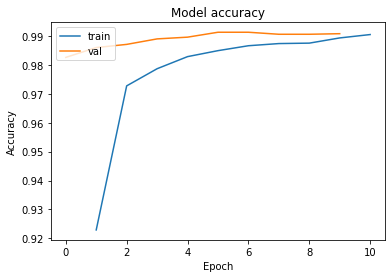

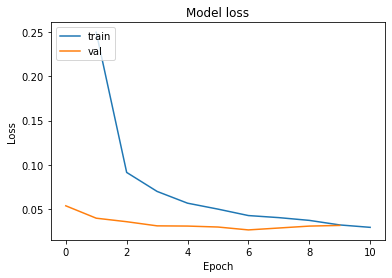

In [31]:
plot_learning_curve(history)

In [ ]:
epoch_range